In [1]:
from tensorflow import keras
from tensorflow.keras import layers
num_words = 30000
maxlen = 200

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.imdb.load_data(num_words=num_words)
print(x_train.shape, ' ', y_train.shape)
print(x_test.shape, ' ', y_test.shape)

(25000,)   (25000,)
(25000,)   (25000,)


In [3]:
x_train = keras.preprocessing.sequence.pad_sequences(x_train, maxlen, padding='post')
x_test = keras.preprocessing.sequence.pad_sequences(x_test, maxlen, padding='post')

In [4]:
print(x_train.shape, ' ', y_train.shape)
print(x_test.shape, ' ', y_test.shape)

(25000, 200)   (25000,)
(25000, 200)   (25000,)


In [7]:
def lstm_model():
    model = keras.Sequential([
        layers.Embedding(input_dim=30000, output_dim=32, input_length=maxlen),
        layers.LSTM(32, return_sequences=True),
        layers.LSTM(1, activation='sigmoid', return_sequences=False)
    ])
    model.compile(optimizer=keras.optimizers.Adam(),
                 loss=keras.losses.BinaryCrossentropy(),
                 metrics=['accuracy'])
    return model

model = lstm_model()
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 200, 32)           960000    
_________________________________________________________________
lstm_2 (LSTM)                (None, 200, 32)           8320      
_________________________________________________________________
lstm_3 (LSTM)                (None, 1)                 136       
Total params: 968,456
Trainable params: 968,456
Non-trainable params: 0
_________________________________________________________________


In [8]:
history = model.fit(x_train, y_train, batch_size=64, epochs=2, validation_split=0.1)

Train on 22500 samples, validate on 2500 samples
Epoch 1/2
22500/22500 [==============================] - 40s 2ms/sample - loss: 0.5784 - accuracy: 0.6798 - val_loss: 0.3702 - val_accuracy: 0.8576
Epoch 2/2
22500/22500 [==============================] - 37s 2ms/sample - loss: 0.3215 - accuracy: 0.8806 - val_loss: 0.3319 - val_accuracy: 0.8712


/Users/gaohang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Unrecognized location 'upper_left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  after removing the cwd from sys.path.


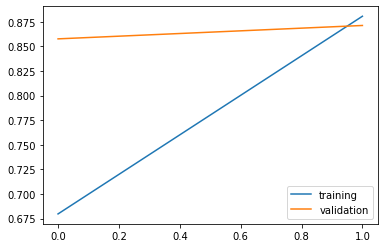

In [11]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc='upper_left')
plt.show()